In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Parameters for the simulation
S0 = 100  # Initial stock price
mu = 0.1  # Drift (expected return)

#Explore how different inputs (drift, volatility) affect the simulation results. (sensitivity analysis)
sigma = 0.2  # Volatility
T = 1.0  # Time period (1 year)
n_steps = 252  # Number of time steps (daily)
n_simulations = 1000  # Number of Monte Carlo simulations

# Time increment
dt = T / n_steps

In [35]:
# Simulate GBM for n_simulations
simulations = np.zeros((n_simulations, n_steps + 1))
simulations[:, 0] = S0

In [36]:
# Generate random shocks and paths
for t in range(1, n_steps + 1):
    Z = np.random.standard_normal(n_simulations)  # Random values from normal distribution
    simulations[:, t] = simulations[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

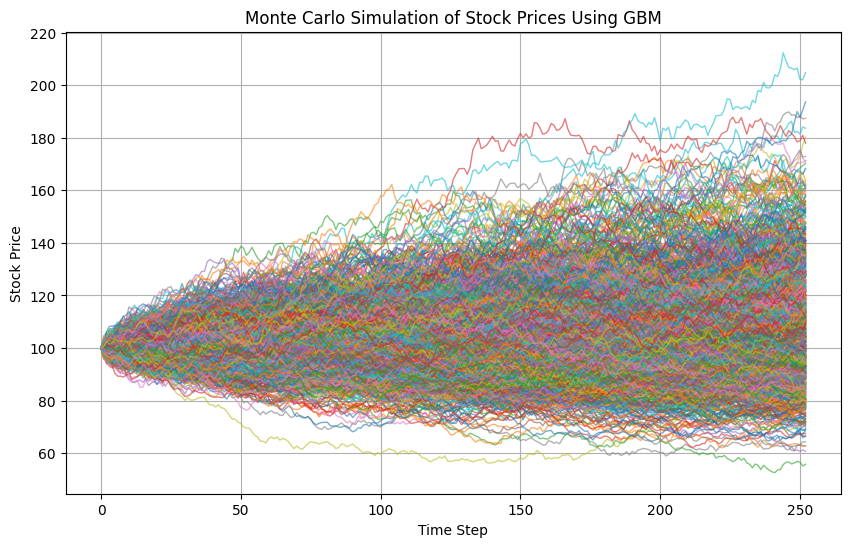

In [37]:
# Plot some of the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, lw=1, alpha=0.6)
plt.title("Monte Carlo Simulation of Stock Prices Using GBM")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

In [38]:
expected_price = np.mean(simulations[:, -1])
print(f"Expected stock price at T: {expected_price:.2f}")

Expected stock price at T: 109.86


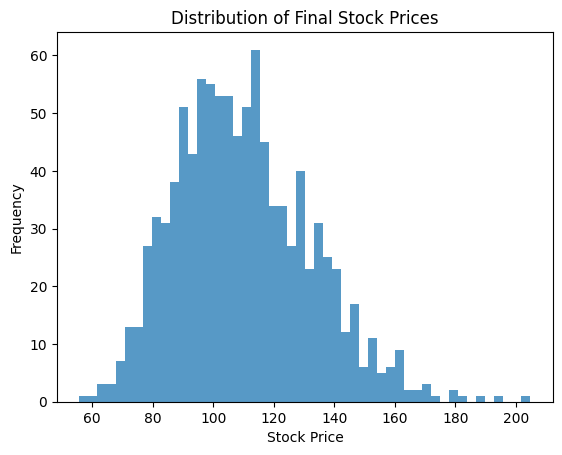

In [39]:
plt.hist(simulations[:, -1], bins=50, alpha=0.75)
plt.title("Distribution of Final Stock Prices")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

In [40]:
percentile_5 = np.percentile(simulations[:, -1], 5)
print(f"5% VaR: {percentile_5:.2f}")

5% VaR: 77.67


In [41]:
cvar = np.mean(simulations[:, -1][simulations[:, -1] < percentile_5])
print(f"Conditional VaR (Expected Shortfall): {cvar:.2f}")

Conditional VaR (Expected Shortfall): 72.04


In [42]:
target_price = 120  # Example target
prob_hit_target = np.mean(simulations[:, -1] > target_price)
print(f"Probability of stock price exceeding {target_price}: {prob_hit_target * 100:.2f}%")

Probability of stock price exceeding 120: 29.90%


In [43]:
K = 110  # Strike price
call_payoff = np.maximum(simulations[:, -1] - K, 0)
option_price = np.exp(-mu * T) * np.mean(call_payoff)  # Discount to present value
print(f"European Call Option Price: {option_price:.2f}")

European Call Option Price: 8.00


In [44]:
min_price = np.min(simulations, axis=1)
max_price = np.max(simulations, axis=1)

In [45]:
confidence_interval = np.percentile(simulations[:, -1], [2.5, 97.5])
print(f"95% confidence interval for the stock price: {confidence_interval}")

95% confidence interval for the stock price: [ 72.99082885 158.35400794]


In [46]:
annual_return = (np.mean(simulations[:, -1]) - S0) / S0
annual_volatility = np.std(simulations[:, -1]) / np.mean(simulations[:, -1])
sharpe_ratio = annual_return / annual_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.49
